In [38]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm.notebook import tqdm, trange

In [97]:
def extractFeatures(data):
	mean = data.mean()
	rmax = data.max()
	rmin = data.min()
	variance = data.var()
	std = data.std()
	skew1  = skew(data)
	features = [mean, rmax, rmin, variance, std, skew1]
	return features

def makeFeatureHeader(features, colNames):
	header = []
	for col in colNames:
		for feature in features:
			header.append(col + "_" + feature)
	header.append("activity")
	return header

In [98]:
features = ["mean", "max", "min", "var", "std", "skew"]
activites = {'a01': 'sitting', 'a02': 'standing', 'a03': 'lyingBack','a04':'lyingRigh','a05':'ascendingStairs','a06':'decendingStairs', 'a07':'standingInElevatorStill','a08':'movingInElevator','a09':'walkingLot','a10':'walkingTreadmillFlat', 'a11':'walkingTreadmillIncline','a12':'runningTreadmill','a13':'stepper', 'a14':'crossTrainer', 'a15':'cyclingHorizontal','a16':'cyclingVertical','a17':'rowing','a18':'jumping','a19':'basketBall'}
people = ['p1','p2','p3','p4','p5','p6','p7','p8']

collumNames = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag",
"RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro","RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
"LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro","LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
"RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro","RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
"LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro","LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]

In [129]:
mainDir = "./dsads.feat"
dsads = pd.read_csv("./dsads.feat", index_col=None)
dsads

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat396,Feat397,Feat398,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,ActivityName
0,0.590795,0.500645,0.988700,0.500601,0.960170,0.501062,0.802085,0.590795,0.500555,0.500518,...,0.000001,0.86705,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,sitting
1,0.590930,0.500480,0.989505,0.500321,0.970860,0.500747,0.786460,0.590930,0.500396,0.500406,...,0.000003,0.78944,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,sitting
2,0.590855,0.500264,0.995600,0.500233,0.968360,0.500270,0.807290,0.590855,0.500204,0.500172,...,0.000002,0.85388,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,sitting
3,0.590865,0.500766,0.991820,0.500733,0.968830,0.500985,0.791665,0.590865,0.500626,0.500586,...,0.000001,0.87393,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,sitting
4,0.590735,0.500408,0.994310,0.500360,0.968620,0.500472,0.770835,0.590735,0.500293,0.500280,...,0.000002,0.79027,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.627490,0.600140,0.587750,0.585920,0.582625,0.607210,0.656250,0.627490,0.597020,0.592975,...,0.000364,0.31567,0.59518,0.305240,0.058193,0.018280,0.018077,0.47559,0.184140,playing basketball
9116,0.618365,0.618230,0.612305,0.656270,0.605745,0.671750,0.661460,0.618365,0.596175,0.613380,...,0.004851,0.29934,0.60633,0.318200,0.061667,0.068837,0.068688,0.54715,0.264890,playing basketball
9117,0.612680,0.637905,0.570655,0.564525,0.566530,0.588205,0.635415,0.612680,0.591055,0.706335,...,0.016156,0.15342,0.43880,0.467390,0.157620,0.077912,0.136620,0.77629,0.612430,playing basketball
9118,0.623740,0.648235,0.554640,0.720635,0.551450,0.735985,0.614585,0.623740,0.618230,0.616580,...,0.000947,0.26034,0.58933,0.349810,0.076063,0.024648,0.031143,0.60312,0.333290,playing basketball


In [168]:
import numpy as np
features_df = []
dsads = pd.read_csv("./dsads.feat", index_col=None)
header = makeFeatureHeader(features, collumNames)

for df in tqdm(dsads.values):
    data = df[:-1].reshape(len(collumNames), 9).astype(np.float64)

    activity = df[-1]
    df_s = []
    for s in data:
        df_s.extend(extractFeatures(s))
    df_s.append(activity)
    features_df.append(df_s)
features_df = pd.DataFrame(features_df, columns=header)
print(features_df)

  0%|          | 0/9120 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [173]:
features_df.to_csv("features.csv")

In [171]:
features = pd.read_csv("features.csv", index_col=0)

In [174]:
features

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,0.659490,0.988700,0.500555,0.036600,0.191310,0.779227,0.634976,0.811475,0.500316,0.015449,...,0.138613,0.372308,0.626168,0.222376,0.86705,0.000001,0.105025,0.324076,1.203911,sitting
1,0.658959,0.989505,0.500321,0.036946,0.192212,0.813329,0.634026,0.778690,0.500252,0.014757,...,0.144351,0.379936,0.895180,0.263108,0.78944,0.000003,0.095894,0.309668,0.724452,sitting
2,0.661548,0.995600,0.500204,0.037893,0.194661,0.779662,0.635773,0.852460,0.500153,0.017152,...,0.143407,0.378691,0.622680,0.210494,0.85388,0.000002,0.103101,0.321093,1.259802,sitting
3,0.659684,0.991820,0.500626,0.037087,0.192580,0.805569,0.640500,0.770490,0.500515,0.015809,...,0.089692,0.299486,0.553779,0.209177,0.87393,0.000001,0.099734,0.315807,1.290268,sitting
4,0.657419,0.994310,0.500293,0.036749,0.191700,0.847760,0.660391,0.942625,0.500168,0.030726,...,0.083132,0.288325,0.938126,0.199524,0.79027,0.000002,0.091984,0.303289,1.238806,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.607988,0.656250,0.582625,0.000535,0.023123,0.809593,0.700501,0.959015,0.557375,0.026155,...,0.208031,0.456104,0.707081,0.218970,0.59518,0.000364,0.042185,0.205390,0.523929,playing basketball
9116,0.628741,0.671750,0.596175,0.000651,0.025524,0.540690,0.699161,0.942625,0.557375,0.026129,...,0.195188,0.441801,0.698917,0.248884,0.60633,0.004851,0.042647,0.206512,0.503227,playing basketball
9117,0.597739,0.637905,0.564525,0.000714,0.026720,0.214821,0.725101,0.901640,0.598360,0.011313,...,0.177737,0.421588,0.661308,0.315182,0.77629,0.016156,0.063113,0.251223,0.531097,playing basketball
9118,0.632360,0.735985,0.551450,0.003559,0.059660,0.416389,0.701694,0.942625,0.557375,0.024608,...,0.202430,0.449923,0.707578,0.252077,0.60312,0.000947,0.049752,0.223052,0.392986,playing basketball


In [175]:
indexes = features[(features['activity'] == 'crossTrainer')].index
features.drop(indexes , inplace=True)

In [176]:
indexes = features[(features['activity'] == 'stepper')].index
features.drop(indexes , inplace=True)

In [177]:
indexes = features[(features['activity'] == 'cyclingVertical')].index
features.drop(indexes , inplace=True)

In [178]:
indexes = features[(features['activity'] == 'standingInElevatorStill')].index
features.drop(indexes , inplace=True)

In [179]:
indexes = features[(features['activity'] == 'cyclingHorizontal')].index
features.drop(indexes , inplace=True)

In [180]:
indexes = features[(features['activity'] == 'basketBall')].index
features.drop(indexes , inplace=True)

In [181]:
indexes = features[(features['activity'] == 'rowing')].index
features.drop(indexes , inplace=True)

In [182]:
indexes = features[(features['activity'] == 'movingInElevator')].index
features.drop(indexes , inplace=True)

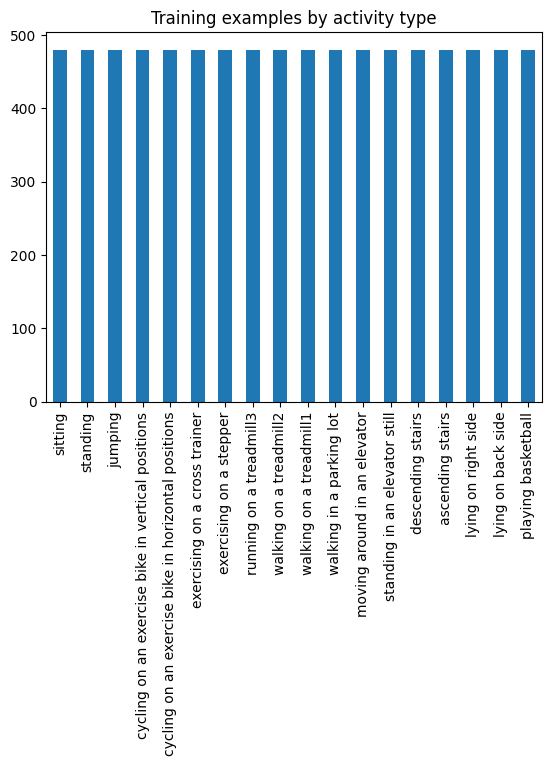

In [183]:
features['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [184]:
features.to_csv("./new_features.csv", mode='w')

# Check Point

In [185]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [199]:
features_RA = features.filter(regex='RA_')
features_LA = features.filter(regex='LA_')

In [200]:
features_RA.insert(3, 'activity', features['activity'])

In [201]:
features_LA.insert(3, 'activity', features['activity'])

In [202]:
features_RA['activity'].value_counts()

sitting                                                480
standing                                               480
jumping                                                480
cycling on an exercise bike in vertical positions      480
cycling on an exercise bike in horizontal positions    480
exercising on a cross trainer                          480
exercising on a stepper                                480
running on a treadmill3                                480
walking on a treadmill2                                480
walking on a treadmill1                                480
walking in a parking lot                               480
moving around in an elevator                           480
standing in an elevator still                          480
descending stairs                                      480
ascending stairs                                       480
lying on right side                                    480
lying on back side                                     4

In [203]:
features_LA['activity'].value_counts()

sitting                                                480
standing                                               480
jumping                                                480
cycling on an exercise bike in vertical positions      480
cycling on an exercise bike in horizontal positions    480
exercising on a cross trainer                          480
exercising on a stepper                                480
running on a treadmill3                                480
walking on a treadmill2                                480
walking on a treadmill1                                480
walking in a parking lot                               480
moving around in an elevator                           480
standing in an elevator still                          480
descending stairs                                      480
ascending stairs                                       480
lying on right side                                    480
lying on back side                                     4

In [204]:
features_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.666217,0.996410,0.500236,sitting,0.041623,0.204018,0.750876,0.648541,0.901640,0.500163,...,0.502442,0.021857,0.147842,0.216773,0.601308,0.928675,0.500047,0.025037,0.158232,1.321729
1,0.660428,0.996860,0.500164,sitting,0.039884,0.199709,0.845399,0.621197,0.786885,0.500129,...,0.501908,0.021870,0.147886,0.326222,0.600847,0.926695,0.500031,0.025312,0.159099,1.317695
2,0.670493,0.997085,0.500169,sitting,0.043476,0.208508,0.708457,0.640340,0.934425,0.500161,...,0.501661,0.021571,0.146871,0.200701,0.601678,0.930790,0.500025,0.025497,0.159679,1.320537
3,0.665741,0.996965,0.500201,sitting,0.041515,0.203752,0.758745,0.640342,0.983605,0.500173,...,0.501922,0.021921,0.148057,0.215661,0.601109,0.930335,0.500030,0.025409,0.159402,1.324240
4,0.665961,0.997435,0.500143,sitting,0.041701,0.204208,0.760089,0.614815,0.786885,0.500125,...,0.501996,0.021434,0.146404,0.295246,0.600578,0.925065,0.500033,0.024734,0.157270,1.320136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.669692,0.774545,0.525219,playing basketball,0.008840,0.094022,-0.580686,0.751711,0.975410,0.524590,...,0.507692,0.048895,0.221122,0.710848,0.598706,0.796645,0.500159,0.010677,0.103328,0.755525
9116,0.717731,0.951700,0.579795,playing basketball,0.017959,0.134012,0.650038,0.728691,0.983605,0.532787,...,0.500000,0.049986,0.223575,0.712659,0.616680,0.829140,0.500288,0.012636,0.112409,0.570146
9117,0.645843,0.696200,0.576385,playing basketball,0.001636,0.040450,-0.050207,0.742394,0.942625,0.598360,...,0.500000,0.050420,0.224543,0.706127,0.647555,0.873900,0.500424,0.019702,0.140366,0.398422
9118,0.655062,0.740365,0.545995,playing basketball,0.005130,0.071622,-0.456634,0.732996,0.975410,0.524590,...,0.500000,0.049405,0.222273,0.708822,0.621297,0.814680,0.500141,0.013023,0.114117,0.370674


In [205]:
features_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,0.661780,0.996765,0.500409,sitting,0.038750,0.196850,0.760520,0.627662,0.795080,0.500290,...,0.500047,0.039917,0.199793,1.032515,0.599901,0.908405,0.500000,0.025843,0.160758,1.293743
1,0.664213,0.995910,0.500373,sitting,0.039568,0.198918,0.725883,0.636753,0.909835,0.500260,...,0.500000,0.052304,0.228701,0.705961,0.665010,0.923990,0.500001,0.031533,0.177576,0.294093
2,0.661034,0.995945,0.500357,sitting,0.038476,0.196154,0.766765,0.616701,0.803280,0.500229,...,0.500093,0.021229,0.145703,0.562170,0.600939,0.912445,0.500000,0.023809,0.154302,1.278595
3,0.660605,0.993455,0.500521,sitting,0.038101,0.195194,0.764010,0.614071,0.827870,0.500435,...,0.500000,0.041500,0.203717,0.675987,0.605930,0.907565,0.500000,0.025065,0.158319,1.229824
4,0.664156,0.992965,0.500425,sitting,0.039358,0.198388,0.716223,0.616761,1.000000,0.500000,...,0.500045,0.021722,0.147383,0.789628,0.599048,0.909055,0.500000,0.024512,0.156564,1.297044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.775194,0.957280,0.583945,playing basketball,0.020129,0.141876,-0.156773,0.766509,1.000000,0.500000,...,0.500000,0.050431,0.224569,0.704058,0.613921,0.823180,0.500852,0.011843,0.108826,0.647959
9116,0.721831,0.812360,0.580190,playing basketball,0.004782,0.069154,-0.661171,0.733165,1.000000,0.500000,...,0.500000,0.050483,0.224684,0.704906,0.626861,0.842830,0.500758,0.014392,0.119967,0.508995
9117,0.711946,0.782600,0.598860,playing basketball,0.005475,0.073992,-0.420214,0.730328,0.959015,0.540983,...,0.500000,0.048039,0.219178,0.705856,0.668121,0.938025,0.501475,0.028089,0.167599,0.513593
9118,0.727228,0.878775,0.558180,playing basketball,0.014501,0.120420,-0.350805,0.738886,1.000000,0.500000,...,0.505865,0.040479,0.201194,0.871119,0.609638,0.801580,0.500174,0.013361,0.115591,0.654843


In [206]:
##x,y,z dont have the same variance so we need to scale the data
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]]

y= features_RA['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_RA_X = pd.DataFrame(data = X, columns = ["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"])
scaled_RA_X['label'] = y.values


scaled_RA_X.head(10)

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew,label
0,0.668843,1.092894,-0.776262,1.358174,1.200295,-0.179330,-0.616960,-0.790803,-0.830919,-0.529136,...,-2.213617,-2.360004,-1.828540,-1.040030,1.211000,-0.423746,1.169380,1.126912,1.810593,sitting
1,0.484718,1.097433,-0.778644,1.233482,1.117975,0.048118,-1.298634,-3.121644,-0.832247,-1.494924,...,-2.212159,-2.358108,-1.363777,-1.057508,1.181323,-0.425009,1.205715,1.154962,1.800676,sitting
2,0.804830,1.099703,-0.778483,1.490935,1.286073,-0.281404,-0.821410,-0.124892,-0.831025,-0.522699,...,-2.245428,-2.401518,-1.896790,-1.026025,1.242700,-0.425509,1.230154,1.173743,1.807662,sitting
3,0.653686,1.098492,-0.777430,1.350397,1.195212,-0.160396,-0.821345,0.874026,-0.830555,0.322686,...,-2.206538,-2.350804,-1.833266,-1.047556,1.235880,-0.425074,1.218484,1.164784,1.816766,sitting
4,0.660676,1.103233,-0.779352,1.363731,1.203924,-0.157162,-1.457730,-3.121644,-0.832388,-1.423367,...,-2.260662,-2.421496,-1.495313,-1.067692,1.156893,-0.424865,1.129287,1.095780,1.806676,sitting
5,0.659462,1.109739,-0.779457,1.363650,1.203871,-0.157626,-0.799161,-0.624351,-0.832389,-0.708355,...,-2.203148,-2.346402,-1.835521,-1.061268,1.131563,-0.425525,1.110918,1.081453,1.790275,sitting
6,0.769851,1.102224,-0.780235,1.459022,1.265623,-0.253856,-0.843741,-0.291344,-0.829658,-0.594737,...,-2.208137,-2.352882,-1.832200,-1.062073,1.173380,-0.424924,1.136828,1.101650,1.804318,sitting
7,0.734706,1.110042,-0.778251,1.428543,1.245994,-0.223014,-0.821410,-0.291344,-0.830752,-0.572048,...,-2.256861,-2.416506,-1.889294,-1.034330,1.210175,-0.423751,1.150897,1.112584,1.810520,sitting
8,0.624221,1.096374,-0.778610,1.334352,1.184703,-0.120517,-1.003650,-0.790803,-0.832576,-0.541439,...,-2.219709,-2.367934,-1.824456,-1.027528,1.162813,-0.422811,1.143477,1.106820,1.793155,sitting
9,0.784726,1.109789,-0.778840,1.472163,1.274056,-0.268674,-0.867655,-0.957255,-0.833650,-0.780878,...,-2.215481,-2.362430,-1.827292,-1.038886,1.248320,-0.423473,1.191261,1.143822,1.823099,sitting


In [207]:
##x,y,z dont have the same variance so we need to scale the data
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]]

y= features_LA['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_LA_X = pd.DataFrame(data = X, columns = ["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"])
scaled_LA_X['label'] = y.values

scaled_LA_X.head(10)

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew,label
0,0.578589,1.075821,-0.761378,1.316911,1.173504,-0.146901,-1.086921,-3.012873,-0.810079,-1.463319,...,-0.288713,-0.218915,1.462491,-1.119151,0.861909,-0.446566,1.236679,1.185938,1.831762,sitting
1,0.653528,1.067131,-0.762634,1.380028,1.215163,-0.227937,-0.868895,-0.646941,-0.811192,-0.815980,...,1.141693,1.065268,0.204527,1.314958,1.106458,-0.446510,1.999336,1.750216,-0.837788,sitting
2,0.555598,1.067487,-0.763167,1.295820,1.159486,-0.132291,-1.349810,-2.843812,-0.812376,-1.417890,...,-2.446684,-2.621700,-0.349387,-1.080319,0.925302,-0.446558,0.964035,0.969312,1.791311,sitting
3,0.542373,1.042178,-0.757548,1.266864,1.140159,-0.138736,-1.412894,-2.336834,-0.804567,-1.301773,...,-0.105866,-0.044596,0.089061,-0.893727,0.848728,-0.446557,1.132355,1.104092,1.661069,sitting
4,0.651764,1.037197,-0.760836,1.363791,1.204487,-0.250536,-1.348384,1.212014,-0.821039,0.088514,...,-2.389843,-2.547093,0.526835,-1.151035,0.872108,-0.446570,1.058305,1.045224,1.840578,sitting
5,0.670316,1.071095,-0.762318,1.401130,1.228994,-0.241610,-1.239623,0.536077,-0.807610,-0.417898,...,-1.162429,-1.104218,0.153707,-1.110219,0.741949,-0.446569,0.837861,0.865932,1.719209,sitting
6,0.576490,1.049293,-0.758646,1.312927,1.170860,-0.150969,-1.457654,-2.843812,-0.807839,-1.338417,...,-2.512141,-2.708696,-1.093523,-1.153838,0.820798,-0.446557,1.084019,1.065740,1.827914,sitting
7,0.542667,1.047971,-0.761175,1.275557,1.145971,-0.137982,-0.822997,-2.843812,-0.803000,-1.330903,...,-1.593331,-1.579139,1.045618,-0.879483,0.991206,-0.446555,1.028859,1.021630,1.657941,sitting
8,0.590629,1.038976,-0.759452,1.303598,1.164662,-0.189561,-0.868011,-0.646941,-0.807951,-0.319554,...,-0.821293,-0.747377,0.971027,-1.176540,0.793966,-0.446564,1.126840,1.099730,1.846503,sitting
9,0.636581,1.066979,-0.763292,1.365580,1.205665,-0.214142,-1.349499,1.043056,-0.811195,-0.142087,...,-1.981782,-2.034601,-1.026596,-0.903130,1.183111,-0.446546,1.375245,1.292766,1.768082,sitting


In [208]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(scaled_RA_X,
                                                    scaled_RA_X["label"],
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 21)

In [209]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(scaled_LA_X,
                                                    scaled_LA_X["label"],
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 21)

In [210]:
X_train_RA['label'].value_counts()

lying on right side                                    375
sitting                                                372
standing                                               372
descending stairs                                      366
jumping                                                366
cycling on an exercise bike in horizontal positions    366
lying on back side                                     365
exercising on a cross trainer                          361
ascending stairs                                       359
walking in a parking lot                               359
cycling on an exercise bike in vertical positions      359
moving around in an elevator                           356
playing basketball                                     355
walking on a treadmill2                                352
running on a treadmill3                                352
standing in an elevator still                          352
walking on a treadmill1                                3

In [211]:
X_test_RA['label'].value_counts()

exercising on a stepper                                138
walking on a treadmill1                                129
walking on a treadmill2                                128
standing in an elevator still                          128
running on a treadmill3                                128
playing basketball                                     125
moving around in an elevator                           124
ascending stairs                                       121
walking in a parking lot                               121
cycling on an exercise bike in vertical positions      121
exercising on a cross trainer                          119
lying on back side                                     115
descending stairs                                      114
cycling on an exercise bike in horizontal positions    114
jumping                                                114
standing                                               108
sitting                                                1

In [212]:
X_train_LA['label'].value_counts()

lying on right side                                    375
sitting                                                372
standing                                               372
descending stairs                                      366
jumping                                                366
cycling on an exercise bike in horizontal positions    366
lying on back side                                     365
exercising on a cross trainer                          361
ascending stairs                                       359
walking in a parking lot                               359
cycling on an exercise bike in vertical positions      359
moving around in an elevator                           356
playing basketball                                     355
walking on a treadmill2                                352
running on a treadmill3                                352
standing in an elevator still                          352
walking on a treadmill1                                3

In [213]:
X_test_LA['label'].value_counts()

exercising on a stepper                                138
walking on a treadmill1                                129
walking on a treadmill2                                128
standing in an elevator still                          128
running on a treadmill3                                128
playing basketball                                     125
moving around in an elevator                           124
ascending stairs                                       121
walking in a parking lot                               121
cycling on an exercise bike in vertical positions      121
exercising on a cross trainer                          119
lying on back side                                     115
descending stairs                                      114
cycling on an exercise bike in horizontal positions    114
jumping                                                114
standing                                               108
sitting                                                1

In [214]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [215]:
print(X_train_RA.shape, X_test_RA.shape)
print(y_train_RA.shape, y_test_RA.shape)

(6480, 55) (2160, 55)
(6480,) (2160,)


In [216]:
print(X_train_LA.shape, X_test_LA.shape)
print(y_train_LA.shape, y_test_LA.shape)

(6480, 55) (2160, 55)
(6480,) (2160,)


In [217]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

unique, counts = np.unique(y_train_RA, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(y_test_RA, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[['ascending stairs' 359]
 ['cycling on an exercise bike in horizontal positions' 366]
 ['cycling on an exercise bike in vertical positions' 359]
 ['descending stairs' 366]
 ['exercising on a cross trainer' 361]
 ['exercising on a stepper' 342]
 ['jumping' 366]
 ['lying on back side' 365]
 ['lying on right side' 375]
 ['moving around in an elevator' 356]
 ['playing basketball' 355]
 ['running on a treadmill3' 352]
 ['sitting' 372]
 ['standing' 372]
 ['standing in an elevator still' 352]
 ['walking in a parking lot' 359]
 ['walking on a treadmill1' 351]
 ['walking on a treadmill2' 352]]
Test data label statistics::
[['ascending stairs' 121]
 ['cycling on an exercise bike in horizontal positions' 114]
 ['cycling on an exercise bike in vertical positions' 121]
 ['descending stairs' 114]
 ['exercising on a cross trainer' 119]
 ['exercising on a stepper' 138]
 ['jumping' 114]
 ['lying on back side' 115]
 ['lying on right side' 105]
 ['moving around in an elevat

In [220]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps].values  # Ensure labels are in numpy array format

        # Retrieve the most often used label in this segment using np.unique
        unique_labels, counts = np.unique(labels, return_counts=True)
        most_frequent_label = unique_labels[np.argmax(counts)]

        Xs.append(v)
        ys.append(most_frequent_label)

    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train_RA, y_train_RA = create_dataset(X_train_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]], X_train_RA.label, TIME_STEPS, STEP)

X_test_RA, y_test_RA = create_dataset(X_test_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]], X_test_RA.label, TIME_STEPS, STEP)

print(X_train_RA.shape, y_train_RA.shape)

(6479, 1, 54) (6479, 1)


In [221]:
X_train_LA, y_train_LA = create_dataset(X_train_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]], X_train_LA.label, TIME_STEPS, STEP)

X_test_LA, y_test_LA = create_dataset(X_test_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]], X_test_LA.label, TIME_STEPS, STEP)

print(X_train_LA.shape, y_train_LA.shape)

(6479, 1, 54) (6479, 1)


In [222]:
from sklearn.preprocessing import OneHotEncoder

enc1 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc1.fit(y_train_RA)

y_train_RA = enc1.transform(y_train_RA)
y_test_RA = enc1.transform(y_test_RA)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [223]:
from sklearn.preprocessing import OneHotEncoder

enc2 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc2 = enc2.fit(y_train_LA)

y_train_LA = enc2.transform(y_train_LA)
y_test_LA = enc2.transform(y_test_LA)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [224]:
print("X_train.shape: ", X_train_RA.shape)
print("X_test.shape ", X_test_RA.shape)
print("y_train.shape ", y_train_RA.shape)
print("y_test.shape ", y_test_RA.shape)

X_train.shape:  (6479, 1, 54)
X_test.shape  (2159, 1, 54)
y_train.shape  (6479, 18)
y_test.shape  (2159, 18)


In [225]:
print("X_train.shape: ", X_train_RA.shape)
print("X_test.shape ", X_test_RA.shape)
print("y_train.shape ", y_train_RA.shape)
print("y_test.shape ", y_test_RA.shape)

X_train.shape:  (6479, 1, 54)
X_test.shape  (2159, 1, 54)
y_train.shape  (6479, 18)
y_test.shape  (2159, 18)


In [226]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [233]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical


In [228]:
#Epoch 500

verbose,epochs,batch_size=1,10,32

n_timesteps,n_features,n_outputs=X_train_RA.shape[1],X_train_RA.shape[2],y_train_RA.shape[1]

In [229]:
n_timesteps, n_features, n_outputs

(1, 54, 18)

In [230]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train_RA.shape[1], X_train_RA.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train_RA.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])


In [231]:
history = model.fit(X_train_RA, y_train_RA, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
183/183 [==============================] - 11s 9ms/step - loss: 1.4560 - acc: 0.5347 - val_loss: 0.8308 - val_acc: 0.6867
Epoch 2/10
183/183 [==============================] - 1s 5ms/step - loss: 0.7570 - acc: 0.7103 - val_loss: 0.6602 - val_acc: 0.7361
Epoch 3/10
183/183 [==============================] - 1s 5ms/step - loss: 0.6502 - acc: 0.7565 - val_loss: 0.5807 - val_acc: 0.7670
Epoch 4/10
183/183 [==============================] - 1s 5ms/step - loss: 0.5822 - acc: 0.7764 - val_loss: 0.5281 - val_acc: 0.7824
Epoch 5/10
183/183 [==============================] - 1s 5ms/step - loss: 0.5469 - acc: 0.7939 - val_loss: 0.4971 - val_acc: 0.8056
Epoch 6/10
183/183 [==============================] - 1s 5ms/step - loss: 0.5134 - acc: 0.8005 - val_loss: 0.4824 - val_acc: 0.8071
Epoch 7/10
183/183 [==============================] - 1s 5ms/step - loss: 0.4881 - acc: 0.8102 - val_loss: 0.4782 - val_acc: 0.8117
Epoch 8/10
183/183 [==============================] - 1s 5ms/step - loss: 0

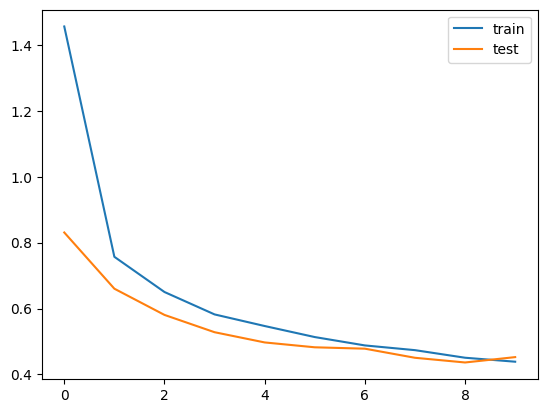

In [234]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [235]:
model.evaluate(X_test_RA, y_test_RA)
y_pred = model.predict(X_test_RA)

68/68 [==============================] - 1s 3ms/step


In [236]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_RA,axis=1)
Y_pred = np.argmax(model.predict(X_test_RA),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

68/68 [==============================] - 0s 2ms/step
Confusion Matrix
[[ 88   0   0  30   0   0   0   0   0   1   1   0   0   0   0   0   0   1]
 [  0  87  15   0   0   1   0   0   0   7   0   0   1   1   1   0   0   1]
 [  0  10 109   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0]
 [  6   0   0 105   0   0   0   0   0   1   0   0   0   0   0   2   0   0]
 [  0   0   0   0 118   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   3 128   0   0   0   0   3   0   0   0   0   1   1   1]
 [  0   0   0   0   0   0 113   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  54  37   0   0   0  22   2   0   0   0   0]
 [  0   0   0   0   0   0   0  14  67   0   0   0  14  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 101   0   0   1   6  14   0   1   0]
 [  0   0   2   0   0   0   0   0   0   1 121   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0 

In [237]:
model.evaluate(X_test_LA, y_test_LA)
y_pred = model.predict(X_test_LA)

68/68 [==============================] - 0s 2ms/step


In [243]:
%time
print(X_test_RA.shape,y_test_RA.shape)
base_loss,base_accuracy=model.evaluate(X_test_RA,y_test_RA,batch_size=batch_size,verbose=1)

cnn_file='CNN_Model.h5'

tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy > {:.2f}%'.format(score))
print('Base Loss > {:.2f}'.format(base_loss))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
(2159, 1, 54) (2159, 18)
68/68 [==============================] - 0s 3ms/step - loss: 0.4510 - acc: 0.8282
model saved at  CNN_Model.h5
Accuracy > 82.82%
Base Loss > 0.45


<ipython-input-243-69e9162c1979>:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, cnn_file, include_optimizer=False)


# Fine-Tunning

https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [257]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [275]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 3

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(18, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  4


In [276]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional,False
1,<keras.src.layers.regularization.dropout.Dropo...,dropout,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense,False
3,<keras.src.layers.core.dense.Dense object at 0...,dense_1,True


In [277]:
history2 = new_model.fit(X_train_LA, y_train_LA, epochs=30, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/30
183/183 [==============================] - 5s 11ms/step - loss: 3.3623 - accuracy: 0.1158 - val_loss: 2.8739 - val_accuracy: 0.1574
Epoch 2/30
183/183 [==============================] - 1s 4ms/step - loss: 2.5568 - accuracy: 0.2250 - val_loss: 2.2398 - val_accuracy: 0.3272
Epoch 3/30
183/183 [==============================] - 1s 4ms/step - loss: 2.0347 - accuracy: 0.3806 - val_loss: 1.8242 - val_accuracy: 0.4614
Epoch 4/30
183/183 [==============================] - 1s 4ms/step - loss: 1.6926 - accuracy: 0.4881 - val_loss: 1.5552 - val_accuracy: 0.5278
Epoch 5/30
183/183 [==============================] - 1s 4ms/step - loss: 1.4743 - accuracy: 0.5488 - val_loss: 1.3768 - val_accuracy: 0.5880
Epoch 6/30
183/183 [==============================] - 1s 4ms/step - loss: 1.3272 - accuracy: 0.5913 - val_loss: 1.2525 - val_accuracy: 0.6296
Epoch 7/30
183/183 [==============================] - 1s 4ms/step - loss: 1.2183 - accuracy: 0.6177 - val_loss: 1.1654 - val_accuracy: 0.6543
Epoch

# 미세조정

In [278]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [279]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional,True
1,<keras.src.layers.regularization.dropout.Dropo...,dropout,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_1,True


In [280]:
history2 = new_model.fit(X_train_LA, y_train_LA, epochs=40, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/40
183/183 [==============================] - 4s 9ms/step - loss: 0.7228 - accuracy: 0.7374 - val_loss: 0.7059 - val_accuracy: 0.7623
Epoch 2/40
183/183 [==============================] - 1s 5ms/step - loss: 0.7169 - accuracy: 0.7359 - val_loss: 0.6993 - val_accuracy: 0.7608
Epoch 3/40
183/183 [==============================] - 1s 5ms/step - loss: 0.7068 - accuracy: 0.7373 - val_loss: 0.6923 - val_accuracy: 0.7670
Epoch 4/40
183/183 [==============================] - 1s 5ms/step - loss: 0.7039 - accuracy: 0.7419 - val_loss: 0.6867 - val_accuracy: 0.7670
Epoch 5/40
183/183 [==============================] - 1s 5ms/step - loss: 0.7037 - accuracy: 0.7340 - val_loss: 0.6793 - val_accuracy: 0.7670
Epoch 6/40
183/183 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.7390 - val_loss: 0.6749 - val_accuracy: 0.7701
Epoch 7/40
183/183 [==============================] - 1s 5ms/step - loss: 0.6905 - accuracy: 0.7446 - val_loss: 0.6695 - val_accuracy: 0.7701
Epoch 

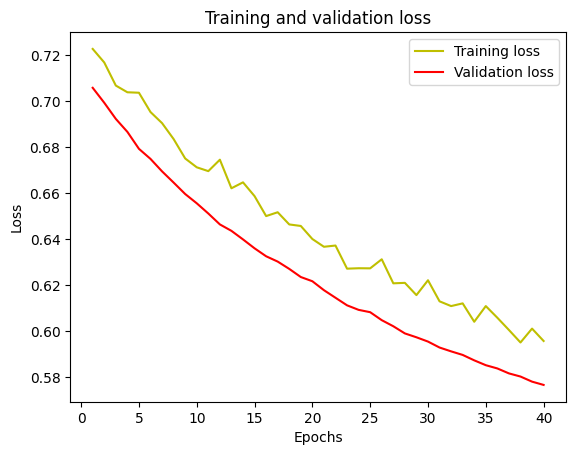

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

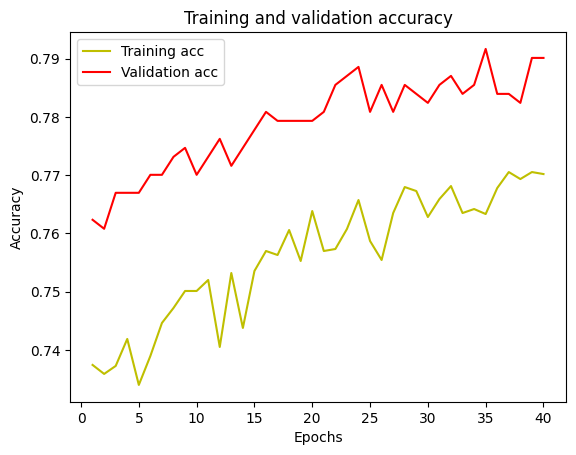

In [285]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [286]:
new_model.evaluate(X_test_LA, y_test_LA)
y_pred = new_model.predict(X_test_LA)

68/68 [==============================] - 0s 2ms/step
